# Name : Manan Sharma

# Data Science and Business Analytics Internship at the Sparks Foundation

In [21]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#importing dataset to the dataframe
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [3]:
#So, our dataset contains two columns (Hours,Scores)

# Data Exploration

In [4]:
df.describe()   #Basic Statistics of the data 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.shape  #So, it has 25 rows and 2 columns

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [7]:
df.isnull().sum()  #So, this dataset does not have any null values

Hours     0
Scores    0
dtype: int64

# Detecting Outliers and Handling them

In [8]:
#Detecting outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1                         
print(IQR)

Hours      4.7
Scores    45.0
dtype: float64


In [9]:
Lower_Whisker = Q1 - 1.5 *IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

Hours     -4.35
Scores   -37.50
dtype: float64 Hours      14.45
Scores    142.50
dtype: float64


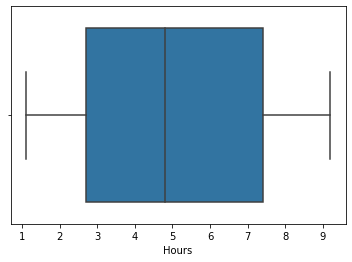

In [10]:
sb.boxplot(df['Hours'])   #So, it does not have as such any outliers, so we are good to go.

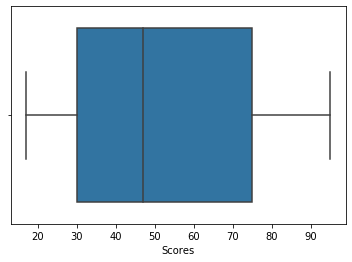

In [11]:
sb.boxplot(df['Scores'])   #So, it does not have as such any outliers, so we are good to go.

# Exploratory Data Analysis

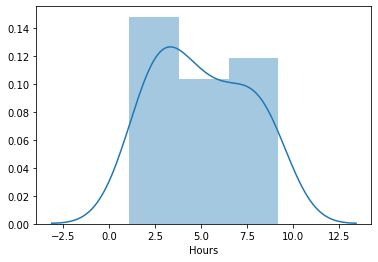

In [12]:
sb.distplot(df['Hours'])

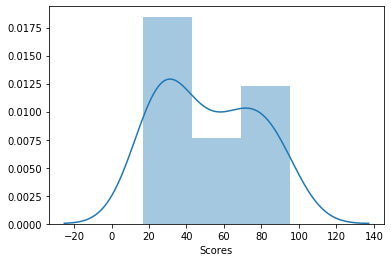

In [13]:
sb.distplot(df['Scores'])

Text(0.5, 1.0, 'Hours vs Scores')

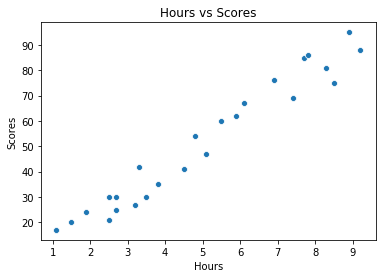

In [16]:
sb.scatterplot(df['Hours'],df['Scores'])
plt.title("Hours vs Scores")

So both hours and scores are linearly dependent to each other. So, we can move forward for Linear regression

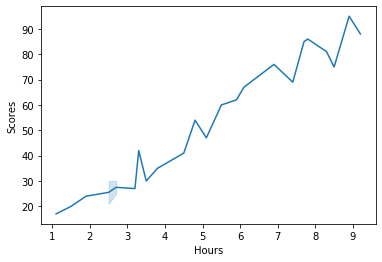

In [15]:
sb.lineplot(df['Hours'],df['Scores'])  #So, we can now proof that this is linearly dependent.

No need of Normalizing or standardizing as the data is in same units

# Model Building

In [20]:
X = df.iloc[:,0].values  
Y = df.iloc[:,-1].values 

In [22]:
#Reshaping data
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)

In [23]:
#Spiltting data into 80% Training data and 20% Testing data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state = 0)

In [24]:
#Importing Linear Regressor in the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
# Fitting data into Linear Regressor
model = lr.fit(xtrain,ytrain)

In [26]:
#Prediction of the model
predicted = model.predict(xtest)

# Model Evaluation

In [ ]:
Now using linear regression equation which (y = mx + c) , we will evaluate how accurate is our predictions

In [27]:
m = model.coef_   #Linear regression line slope
c = model.intercept_  #Linear regression line y-intercept

In [29]:
predicted_line = (m*X) + c


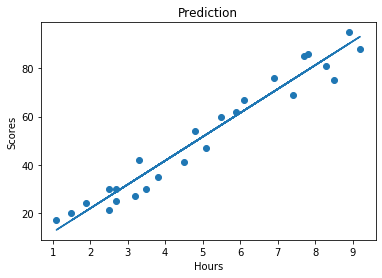

In [30]:
#plotting predicted line
plt.title("Prediction")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(X, Y)
plt.plot(X,predicted_line);
plt.show()

# Checking error of prediction and R2 Score

In [33]:
from sklearn.metrics import mean_absolute_error
print("MAE of predictions is ",mean_absolute_error(ytest,predicted))
print("Accuracy R2 Score of model is",model.score(xtest,ytest))

MAE of predictions is  4.183859899002975
Accuracy R2 Score of model is 0.9454906892105356


In [34]:
#Hence our model is 94.5% Accurate

# Conclusion

We have successfully predicted our scores based on hours we study with accuracy of 94.5% with the help of Linear Regression